![Urgences - Image CC0 - pexels.com](img/pexels-pixabay-263402.jpg "Urgences")

# Biology Order Prescription
*Levi-Dan Azoulay*  
*Shana Zirah*  
*Nathane Berrebi*  
*Gaspard André*  
*Jona Benhamou*    
*Ali Bellamine*

In [10]:
import pandas as pd
import numpy as np

# Plan du document

Les étapes clés de ce projet sont les suivantes :

- I. Introduction
- II. Téléchargement des données et transformation
- III. Exploration et visualisation les données
- IV. Sélection des variables d'interêts
- V. Définition et entrainement d'une solution d'apprentissage statistique

# I. Introduction

 ## I.1 Contexte

Chaque jour, environ 50 000 personnes se présentent dans un service d'accueil des urgences (SAU) en France. En moyenne, 75% des patients retournent à domicile, et 20% sont hospitalisés. La durée moyenne de présence au SAU est longue. On estime que seulement 20% attendront moins d'une heure, tandis que ~30% attendront entre 1h et 2H et ~30% attendront en 2 et 4H. Enfin, un peu plus de 10% resteront au SAU entre 4 et 6H. Dans un contexte de pénurie de soignants, le recours à la consultation au SAU est en constante augmentation depuis plusieurs années. L'optimisation du circuit des urgences est une problématique centrale. Le cout humain et financier des dysfonctionnements du circuit et de l'offre de soin est important. 

Le parcours classique du circuit des urgences est le suivant :  
1. **Premier contact d'ordre administratif**
2. **Premier contact soignant avec une infirmière d'accueil et d'orientation (IAO) (~M30) avec**  :
    - Recueil du motif de consultation
    - Prise des constantes
    - Recueil de quelques antécédents et de l'ordonnance du patient 
    - Eventuellement ECG  


Le patient est classé selon un score de gravité (bleu, vert, jaune, orange, rouge, ou 1-2-3-4-5)

3. **Premier contact médical avec un médecin (~H1)** :
    - Interrogatoire
    - Examen clinique

    
A la suite de cette consultation, plusieurs cas de figures selon la situation.
Le patient peut sortir avec ou sans ordonnance si le diagnostic est posé par l'examen clinique et ne nécéssite ni examen, ni hospitalisation.
Le patient peut nécéssiter la réalisation d'examens (prise de sang, radiographie, scanner) ou motiver un avis d'un spécialiste. Auquel cas il doit attendre

4. **Réalisation des examens complémentaire ou d'un avis (prescription, réalisation, récupération)**
5. **Décision finale : Conclusion une fois les examens récupérés. (~H3)**

Entre chaque étape, le patient attend pendant une durée plus ou moins longue. Le médecin lui « jongle » avec plusieurs patients à la fois à des étapes différentes. 

# I.2 Objectifs

Nous proposons d'aider à raccourcir le temps entre l'arrivée du patient et sa sortie, en ne subordonnant pas la décision de réaliser un examen biologique à l'examen clinique du médecin. Nous savons que le temps entre l'arrivée au SAU et la première visite avec le médecin est le temps le plus long et le plus mal vécu par les patients. 

Nous proposons à l'aide d'un algorithme d'apprentissage statistique de prédire, dès les données fournies par l'IAO, la nécéssité de réaliser un examen de biologie médicale, afin de permettre aux IDE de prélever cet examen juste après l'IAO, de sorte que le médecin dès sa première visite peut conclure avec les résultats de la biologie, qu'il aurait sans cela, demandé et attendu de récuperer avant de conclure et de prendre en charge le patient. 

<table markdown="1">
     <TR>
       <TH>Données d'entrée</TH>
       <TH>Algorithme</TH>
       <TH>Données de sortie</TH>
     </TR>
     <TR>
          <TD></TD>
          <TD></TD>
          <TD>Vecteur {0,1}^d d'examens de biologie associée à sa réalisation (1) ou non (0)</TD>
     </TR>
     <TR>
          <TD>Age</TD>
          <TD ROWSPAN="6">MLP<br \>NLP (Embeddings, Word2Vec ...) <br \>Autres</TD>
          <TD>Ionogramme Complet - {0,1}</TD>
     </TR>
     <TR>
          <TD>Sexe</TD>
          <TD>Bilan hépato-biliaire - {0,1}</TD>
     </TR>
     <TR>
          <TD>Motif de consultation</TD>
          <TD>Numération sanguine (NFS) - {0,1}</TD>
     </TR>
     <TR>
          <TD>Paramètres vitaux (FC, SpO2, PA, T°, FR, EVA)</TD>
          <TD>Glycémie - {0,1}</TD>
     </TR>
     <TR>
          <TD>Ordonnance d'entrée du patient</TD>
          <TD>Hémostase - {0,1}</TD>
     </TR>
     <TR>
          <TD></TD>
          <TD>...</TD>
     </TR>
</table>


# I.3 Définition des métriques

Nous proposons d'effectuer la tache suivante : **prédire les examens biologiques qui seront réalisés lors de l'arrivé d'un patient aux urgences**  
Les métriques d'évaluation des performances seront :
- L'**accuracy**
- La **precision**
- L'**aire sous la courbe (AUC)**

Nous attachons une importance particulière à la précision. En effet, une sur-prescription d'examen biologique non indiqué pourrait entrainer un effet contraire à l'effet escompté, en prolongant le temps de prise en charge des personnes concernées.

# II.  Téléchargement des données et transformation

Les données sont issus du projet MIMIC-IV.  
Le projet MIMIC est un projet d'open-data médical initié par l'hopital _Beth Israel Deaconess_ à Boston.  
Initialement, seul des données de réanimation été accessible.

Pour sa 4ème édition, a été mis à disposition un jeu de données couvrant un spectre bien plus large :
- Données relatives aux passages aux urgences
- Données relatives aux hospitalisations
- Données relatives aux séjour en réanimation
- Données de radiographie thoracique avec compte rendu associé

L'ensemble de ces données ont été mis à disposition dans le cadre de projets complémentaires :
- [MIMIC-IV](https://physionet.org/content/mimiciv/0.4/) : hospitalisation et réanimation
- [MIMIC-IV-ED](https://physionet.org/content/mimic-iv-ed/1.0/) : urgences
- [MIMIC-IV-CXR](https://physionet.org/content/mimic-cxr/2.0.0/) : radiographie thoracique

Ces bases sont complémentaires dans le sens où chaque collecte a été faite durant une période temporelle spécifique, qui se recoupe plus où moins.  
Certains éléments nécessaires à l'exploitation de MIMIC-IV-ED sont présent dans MIMIC-IV.  
La lecture de la documentation de MIMIC-IV et de MIMIC-IV-ED est vivement recommandé (lien ci-dessus).

En complément, un certains nombre de ressources est disponible sur le site du projet [MIMIC-IV](https://mimic.mit.edu/).

## II.1 Téléchargement des données

La base de données de biologie étant volumineuse (nous y reviendrons plus bas), un pré-traitement des données a été effectué.  
Le pré-traitement est le suivant :
- Intégration de l'ensemble des données utiles au sein d'une base de données SQLITE
- Tri des lignes de biologies afin de ne conserver que celles répondant au critères suivants :
  - Date de réalisation >= date de début du passage aux urgences
  - Date de réalisation <= date de fin du passage aux urgences

*Le script de transformation peut être consulté dans `database_constitution/database_constitution.py`*

Un token de téléchargement des données vous a normallement été mis à disposition.

```
    # Commande à executer dans le terminal
    pip install -r requirements.txt
    python download_data.py [TOKEN]
```

## II.2 Transformation des données au format tabulaire

Les données sont extraites depuis la base de données SQLITE de la façon suivante :
  - Récupération et aggrégation des informations suivantes pour chaque consultation aux urgence identifié par un identifiant unique *stay_id* :
    - Date de passage *intime*
    - Genre *gender*
    - Age *age*
    - Température à l'accueil **temperature**
    - Fréquence Cardiaque à l'accueil **heartrate**
    - Fréquence respiratoire à l'accueil **resprate**
    - Saturation en Oxygène à l'accueil **o2sat**
    - Pression artérielle Systolique à l'accueil (**sbp**) et Diastolique (**dbp**)
    - Cotation de douleur à l'accueil **pain**
    - Motif de consultation à l'accueil **chiefcomplaint**
    - Consultation dans les 7 derniers jours **last_7** ou 30 derniers jours **last_30**
    - Antécédents connus au moment de la consultation selon la Classification Internationale des Maladies (CIM) : CIM-9 **icd9** ou CIM10 **icd10**
    - Traitements habituels du patient lors de sa consultation, Generic Sequence Number (GSN) (**gsn**)
  - Récupération des examens prescrits pour chaque consultation aux urgences :
    - Les examens ont été regroupés par paquet correspondant aux techniques de laboratoire et aux organes / aspects fonctionnels explorés sur base de connaissance métier.
    - Il s'agit pour chaque paquet d'examen d'une variables binaire indiquant si l'examen a été prescrit au moins une fois durant le passage aux urgences
    - La prescription est identifié par la présence d'un résultat d'examen dans la table de résultats d'examens biologiques **labevents**
    - Les différentes modalités d'examens sont :
      - Cardiaque (**Cardiaque**)
      - Coagulation (**Coagulation**)
      - Gazométrie (**Gazometrie**)
      - Glycemie Sanguine (**Glycemie_Sanguine**)
      - Hépato-biliaire (**Hepato-Biliaire**)
      - Ionogramme Complet (**IonoC**)
      - Lipase (**Lipase**)
      - Numération de Formule Sanguine (**NFS**)
      - Phospho-Calcique (**Phospho-Calcique**)

In [328]:
from scripts import preprocessing

lab_dictionnary = pd.read_csv("./config/lab_items.csv").set_index("item_id")["3"].to_dict()
get_drugs, get_diseases = True, True

X = preprocessing.generate_features_dataset(
    database="./data/mimic-iv.sqlite",
    get_drugs=get_drugs,
    get_diseases=get_diseases
)

y = preprocessing.generate_labels_dataset(
    database="./data/mimic-iv.sqlite",
    lab_dictionnary=lab_dictionnary,
)

# Par conception, last_7 et last_30 doivent valoir 0 lorsque manquant
X["last_7"] = X["last_7"].fillna(0)
X["last_30"] = X["last_30"].fillna(0)

assert((X["stay_id"] != y["stay_id"]).sum() == 0) # Sanity check

In [329]:
# Train - test split
# Nous gardons 10 000 lignes p

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42
)

# III. Exploration et visualisation les données

In [323]:
import seaborn as sns
from matplotlib import pyplot as plt

Avant d'explorer en détail les données, nous procédons à une identification et un nettoyage des données abérrantes.
Ce nettoyage est effectué à partir de la documentation de MIMIC, de la visualisation des données et de connaissances métier.

## III.1. Identification et suppression des outliers

In [468]:
from scripts.visualisation import plot_all_scatter, plot_missing_outcome, plot_missing_bar
from scripts.preprocessing import remove_outliers

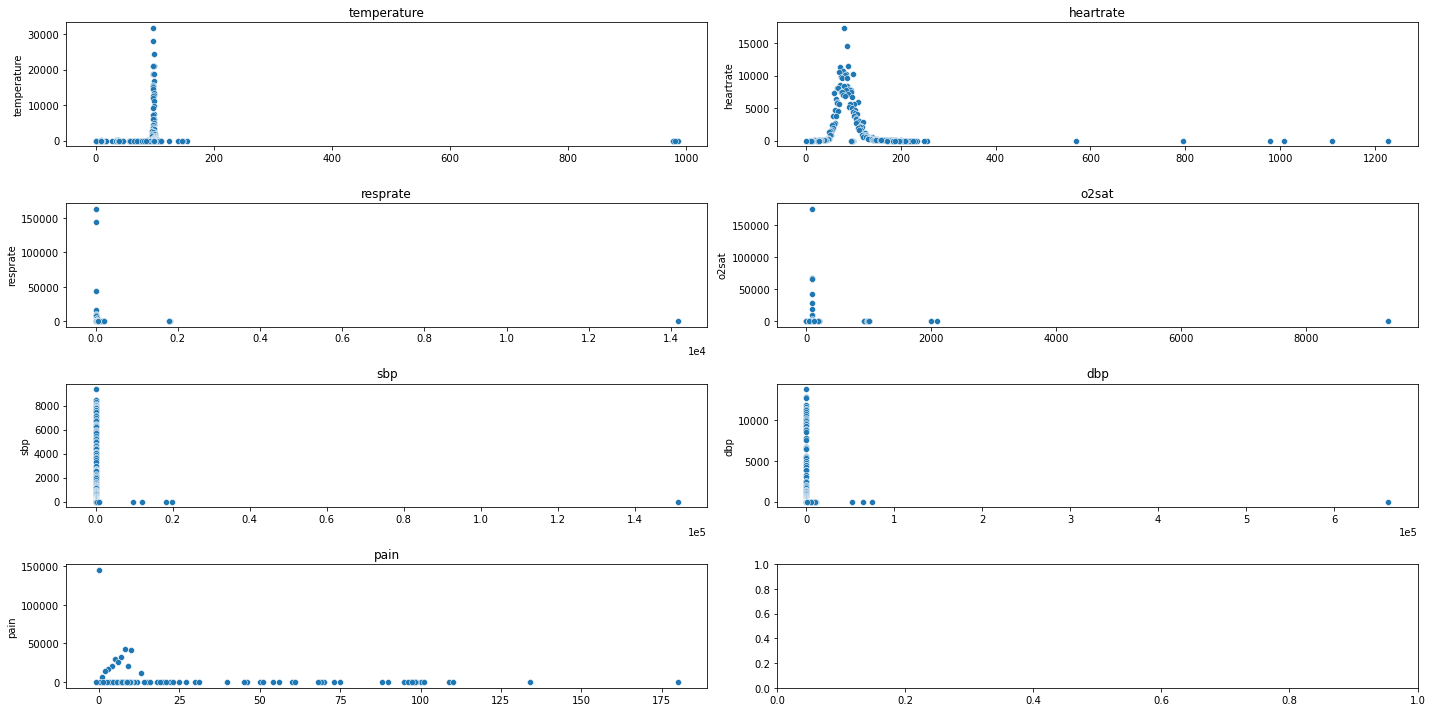

In [337]:
variables = ["temperature", "heartrate", "resprate", "o2sat", "sbp", "dbp", "pain"]
plot_all_scatter(X_train, variables, ncols=2)

In [340]:
variables_ranges = {
    "temperature":[60,130],
    "heartrate":[20, 300],
    "resprate":[5, 50],
    "o2sat":[20, 100],
    "sbp":[40, 250],
    "dbp":[20, 200],
    "pain":[0,10]
}

X_train_clean, outliers = remove_outliers(X_train, variables_ranges)
outliers.round(2)

,n,total,pourcentage
temperature,511,414709,0.12
heartrate,29,421209,0.01
resprate,78,417862,0.02
o2sat,140,417598,0.03
sbp,263,419915,0.06
dbp,623,419090,0.15
pain,11648,409552,2.84


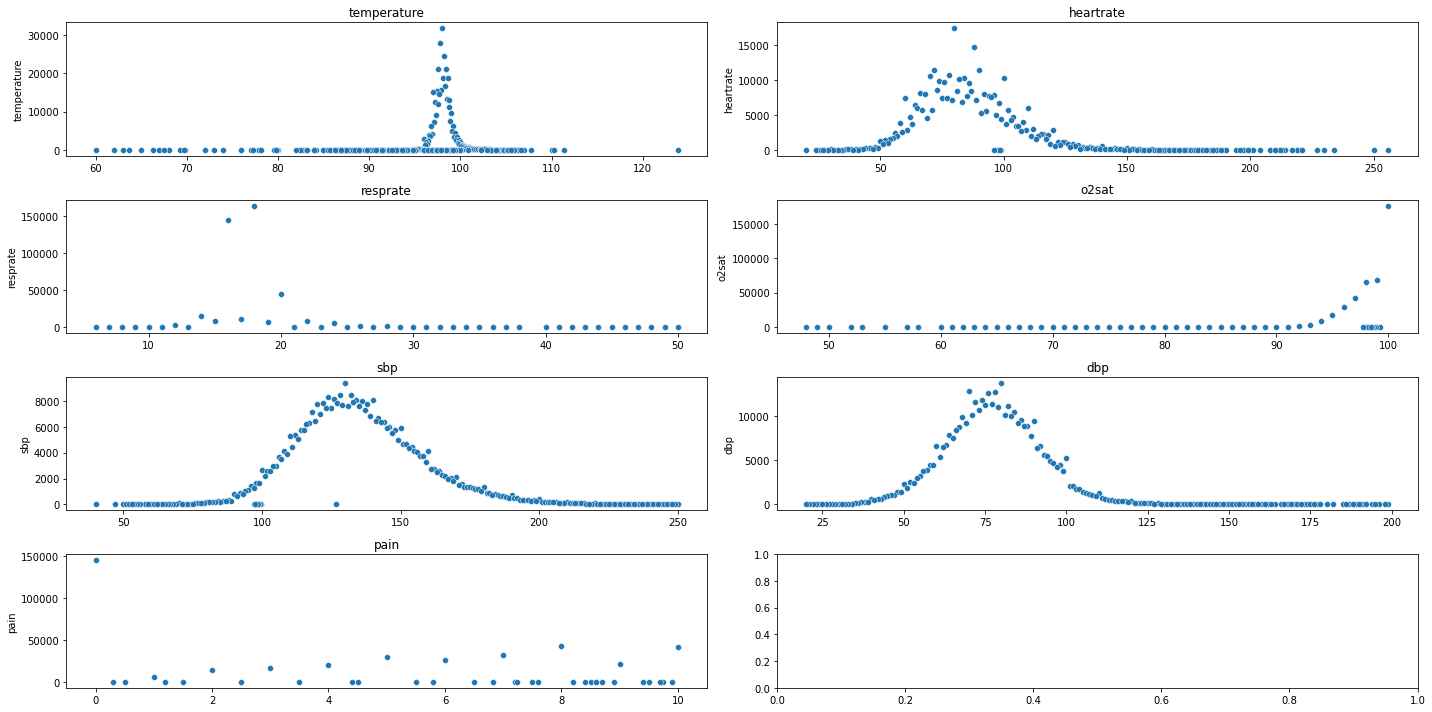

In [341]:
plot_all_scatter(X_train_clean, variables, ncols=2)

## III.2. Analyse des valeurs manquantes

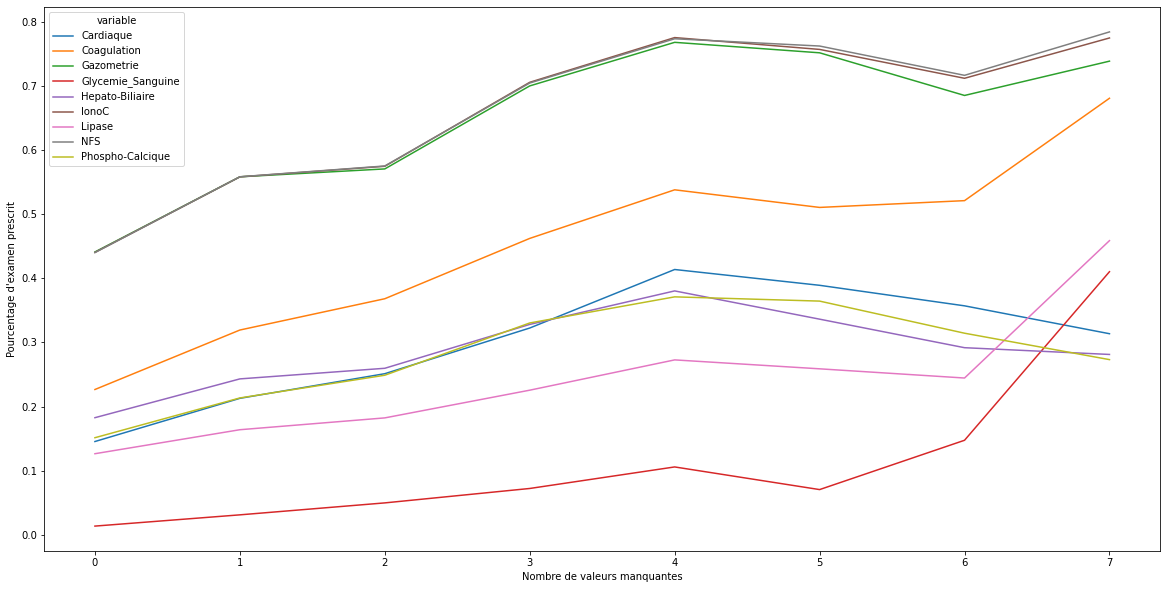

In [446]:
categorical_features = ['gender']
continuous_features = ['age', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain']
features = categorical_features+continuous_features
labels = y_train.columns.values[1:].tolist()

plot_missing_outcome(X_train_clean, y_train, features, labels)

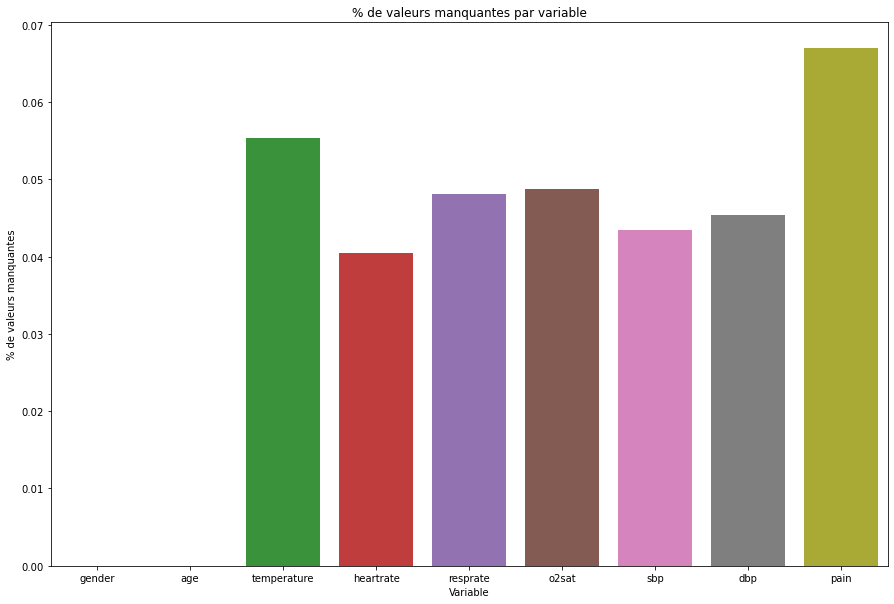

In [469]:
plot_missing_bar(X, features)

In [459]:
(X_train_clean[features].isna()).astype("int")

,gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain
304630,0,0,0,0,0,0,0,0,0
145141,0,0,0,0,0,0,0,0,0
256298,0,0,0,0,0,0,0,0,0
269847,0,0,0,0,0,0,0,0,0
198626,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
164239,0,0,0,0,0,0,0,0,0
238447,0,0,1,1,1,1,1,1,1
448059,0,0,1,0,1,1,0,0,1
300610,0,0,0,0,0,0,0,0,0


In [16]:
# Visualisation des corrélations
# Visualisation du texte
# Analyser des ATCD
# Analyse des traitements

## III. 2. Exploration des labels

In [14]:
# Visualisation de la fréquence des labels

# IV. Sélection des variables d'interêts

In [9]:
# Définir la stratégie de sélection des features (voir sklearn)
# L'appliquer et sortir un dataset pertinent

# V. Définition et entrainement d'une solution d'apprentissage statistique

In [15]:
# Prévoir la pipeline de traitement
# Algorithmes à produire :
# Tree classifier simple : argument, explicabilité
# MLP
# Ajouter les traitements et voir
# Ajouter les ATCD et voir
# Ajouter le texte et voir

# OLD - History

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from matplotlib import pyplot as plt

In [6]:
import torch

In [17]:
Xy["time"] = pd.to_datetime(Xy["intime"])
Xy["time"] = Xy["time"].dt.hour
#X["temperature"] = ((X["temperature"]-32)*(5/9))-37 # On prend 37 comme norme
#X["heartrate"] = X["heartrate"]-80
#X["resprate"] = X["resprate"]-18
#X["o2sat"] = X["o2sat"]-100
#X["sbp"] = X["sbp"]-120
#X["dbp"] = X["dbp"]-80

In [22]:
?sns.histplot

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass

<AxesSubplot:xlabel='time', ylabel='Percent'>

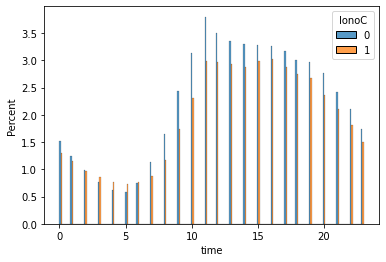

In [27]:
sns.histplot(data=Xy, x="time", hue="IonoC", multiple="dodge", stat="percent")

<AxesSubplot:xlabel='time', ylabel='Density'>

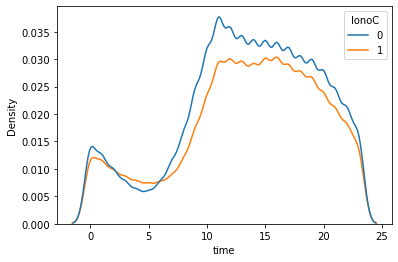

In [30]:
sns.kdeplot(data=Xy, x="time", hue="IonoC", multiple="layer")

<AxesSubplot:xlabel='last_7', ylabel='Percent'>

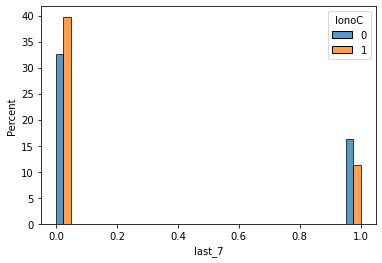

In [32]:
sns.histplot(data=Xy, x="last_7", hue="IonoC", multiple="dodge", stat="percent")

<AxesSubplot:xlabel='last_7', ylabel='Density'>

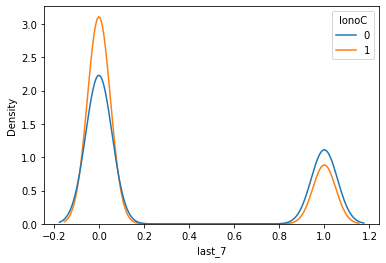

In [34]:
sns.kdeplot(data=Xy, x="last_7", hue="IonoC", multiple="layer")

In [12]:
toto = pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
)

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

IonoC
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

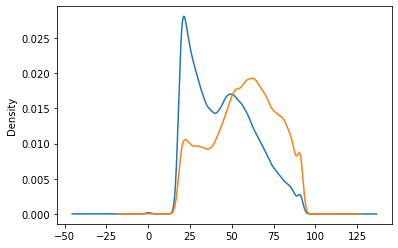

In [5]:
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["age"].plot(kind='kde')

In [49]:
X.loc[(X["temperature"] >= 107),"temperature"] = 107

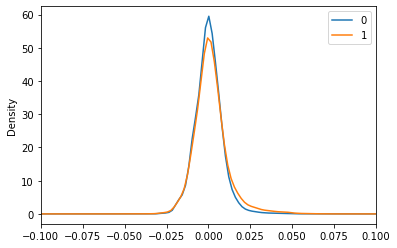

In [71]:
X["temperature_norm"] = (X["temperature"]-X["temperature"].mean())/(X["temperature"].max()-X["temperature"].min())
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["temperature_norm"].plot(kind='kde', ax=ax)
ax.set_xlim(-0.1, 0.1)
ax.legend()

In [73]:
X

,stay_id,intime,gender,age,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,chiefcomplaint,last_7,last_30,icd9,icd10,gsn,time,temperature_norm
0,30000012,2126-02-14 20:22:00,F,65,98.8,96.0,18.0,93.0,160.0,54.0,0.0,CHANGE IN MENTAL STATUS,0.0,1.0,"[2761, 4589, 5712, 5990, 7804]",NaN,"[8209, 21413, 2510, 27462, 66295, 6818, 6818, ...",73320,0.007457
1,30000017,2185-06-18 11:51:00,M,39,NaN,73.0,18.0,97.0,156.0,112.0,0.0,"ETOH, Unable to ambulate",1.0,1.0,"[07070, 30300, V600]",NaN,NaN,42660,NaN
2,30000038,2152-12-07 16:37:00,F,80,97.1,54.0,18.0,95.0,143.0,73.0,0.0,Cough,NaN,NaN,"[9221, 92231, 92232, 95901, E8889]",NaN,"[16925, 15864, 16278, 17037, 17037, 21413, 289...",59820,-0.008446
3,30000039,2165-10-06 11:47:00,M,80,98.6,85.0,16.0,98.0,189.0,96.0,0.0,s/p Fall,NaN,NaN,NaN,NaN,"[8209, 19293]",42420,0.005586
4,30000055,2155-07-18 17:03:00,F,63,99.4,85.0,16.0,100.0,NaN,NaN,0.0,L Ear pain,NaN,NaN,[3804],NaN,[8182],61380,0.013070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448967,39999939,2155-08-04 11:15:00,M,57,98.4,84.0,16.0,97.0,152.0,90.0,2.0,Chest pain,NaN,NaN,NaN,NaN,"[8182, 16578, 22159, 22159, 27475, 27475]",40500,0.003715
448968,39999953,2152-06-22 14:08:00,F,36,98.2,108.0,18.0,100.0,155.0,94.0,5.0,"Palpitations, Dizziness, Headache",NaN,NaN,NaN,NaN,[6655],50880,0.001844
448969,39999961,2145-05-16 17:16:00,F,55,99.3,119.0,22.0,NaN,132.0,74.0,7.0,"Chest pain, Cough, Dyspnea",0.0,1.0,"[4019, 7295, 7820, 78909, E9208]","[C50919, H6692, I10, L308, L538, R112, R29810,...","[16927, 16995, 16995, 13109, 2173, 2169, 18368...",62160,0.012134
448970,39999964,2130-06-05 11:53:00,M,50,98.6,64.0,18.0,99.0,127.0,64.0,4.0,"SI, Depression",0.0,1.0,"[71946, 7242, 78659, 9221, 92231, 92411, 95901...","[F329, H5711, M25561, M549, M79662, R45851, R5...","[44633, 44633, 4561, 4561, 4561, 4540, 4540]",42780,0.005586


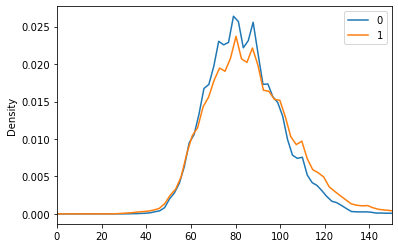

In [76]:
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["heartrate"].plot(kind='kde', ax=ax)
ax.set_xlim(0, 150)
ax.legend()

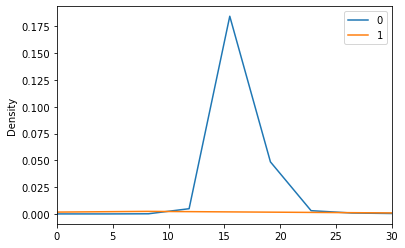

In [77]:
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["resprate"].plot(kind='kde', ax=ax)
ax.set_xlim(0, 30)
ax.legend()

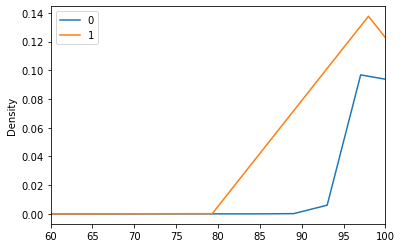

In [81]:
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["o2sat"].plot(kind='kde', ax=ax)
ax.set_xlim(60, 100)
ax.legend()

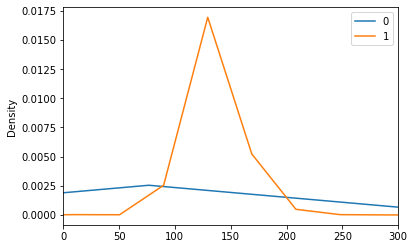

In [86]:
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["sbp"].plot(kind='kde', ax=ax)
ax.set_xlim(0, 300)
ax.legend()

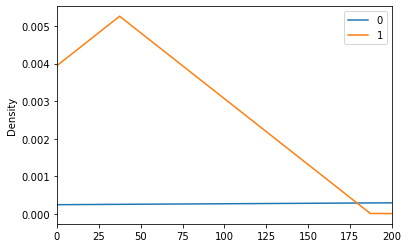

In [85]:
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["dbp"].plot(kind='kde', ax=ax)
ax.set_xlim(0, 200)
ax.legend()

In [98]:
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
)[["IonoC","last_7"]].fillna(0).groupby('IonoC')["last_7"].plot.bar()

In [ ]:
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
)[["IonoC","last_7"]].fillna(0).groupby('IonoC')["last_30"].plot.bar()

In [90]:
import numpy as np

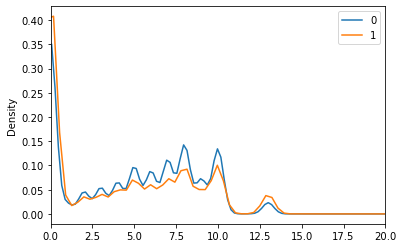

In [93]:
ax = plt.subplot()
pd.merge(
    X,
    y,
    left_on="stay_id",
    right_on="stay_id"
).groupby('IonoC')["pain"].plot(kind='kde', ax=ax)
ax.set_xlim(0, 20)
ax.legend()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
categorical_features = [
    "gender",
    "last_7",
    "last_30"
]

continuous_features = [
    "pain",
    "time",
    "age",
    "temperature",
    "heartrate",
    "resprate",
    "o2sat",
    "sbp",
    "dbp"
]+X_train.columns[14:-1].tolist()

continuous_features = [
    "pain",
    "time",
    "age",
    "temperature",
    "heartrate",
    "resprate",
    "o2sat",
    "sbp",
    "dbp"
]

In [ ]:
features_preprocessing = ColumnTransformer([
    ("binary_encoder", OrdinalEncoder(), categorical_features),
    ("identity", StandardScaler(), continuous_features),
    ("missing", MissingIndicator(), continuous_features),
    ("nlp", Pipeline([
        ("cv", CountVectorizer(ngram_range=(1,1), max_features=200)),
        ("tf-idf", TfidfTransformer())
    ]), "chiefcomplaint"),
])

features_preprocessing_without_nlp = ColumnTransformer([
    ("binary_encoder", OrdinalEncoder(), categorical_features),
    ("identity", StandardScaler(), continuous_features),
    ("missing", MissingIndicator(), continuous_features)
])

full_preprocessing = Pipeline([
    ("features", features_preprocessing_without_nlp),
    ("imputer", SimpleImputer(strategy="median"))
])

pipeline = Pipeline([
    ("preprocessing", full_preprocessing),
    ("mlp", MLPClassifier(hidden_layer_sizes=(100,20), verbose=True, learning_rate_init=1e-3, batch_size=64, max_iter=100))
])

In [ ]:
preprocesser = full_preprocessing.fit(X_train, y_train)

In [ ]:
from transformers import BertTokenizer, BertModel
import pickle
import numpy as np

In [ ]:
bert_name = "dmis-lab/biobert-v1.1"
drug_name = "./models/ATC_2"

biobert_tokenizer = BertTokenizer.from_pretrained(bert_name)

with open(drug_name+"_encoder.model", "rb") as f:
    drug_encoder = pickle.load(f)

In [ ]:
#drug_columns = X_train.columns[14:-1]

#columns_id = drug_encoder.transform(
#    np.expand_dims(np.array(X_train[drug_columns].columns), 1)
#).flatten().astype("int32")

In [ ]:
def get_drug_token_list (df):

    df_drug_tokens = (df[drug_columns] >= 1)*1
    df_drug_tokens = df_drug_tokens.rename(columns=dict(zip(drug_columns, columns_id)))

    df_drug_tokens_list = (df_drug_tokens*(df_drug_tokens.columns+1)).apply(lambda x: list(set(x.tolist()))[1:], axis=1) \
        .tolist()

    df_drug_tokens_list = [torch.tensor(x)-1 for x in df_drug_tokens_list]

    return df_drug_tokens_list

In [ ]:
X_train_preprocess = torch.tensor(preprocesser.transform(X_train), dtype=torch.float32)
X_train_tokens = biobert_tokenizer(X_train["chiefcomplaint"].tolist())["input_ids"]
#X_train_tokens_drug = get_drug_token_list(X_train)
y_train_preprocess = torch.tensor(y_train.iloc[:,1:].values, dtype=torch.float32)
X_test_preprocess = torch.tensor(preprocesser.transform(X_test), dtype=torch.float32)
X_test_tokens = biobert_tokenizer(X_test["chiefcomplaint"].tolist())["input_ids"]
#X_test_tokens_drug = get_drug_token_list(X_test)
y_test_preprocess = torch.tensor(y_test.iloc[:,1:].values, dtype=torch.float32)
X_train_tokens = [torch.tensor(x) for x in X_train_tokens]
X_test_tokens = [torch.tensor(x) for x in X_test_tokens]

In [ ]:
from torch import nn, optim
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import torch
import operator

In [ ]:
class neural_net (nn.Module):
    def __init__(self, n_features, n_outputs, device="cpu"):
        super().__init__()

        self.embedding_encoder = nn.Sequential(*[
            nn.Linear(768, 250),
            nn.ReLU(),
            nn.Linear(250, 50),
            nn.ReLU(),
            nn.Linear(50, 20),
            nn.ReLU()
        ])

        self.network = nn.Sequential(*[
            nn.Linear(n_features+20, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, n_outputs),
            nn.Sigmoid()
        ])

        self.biobert_model = BertModel.from_pretrained(bert_name).to(device)
        self.drug_embedding = torch.load(f"{drug_name}_embedding.model").to(device)     

        for x in self.biobert_model.parameters():
            x.requires_grad = False

        #self.drug_embedding.requires_grad = True
        #self.biobert_model.embeddings.requires_grad = True
            
        #self.loss = nn.BCELoss(weight=torch.tensor(y_train.iloc[:,1:].mean().values))
        self.loss = nn.BCELoss()
        #self.loss = nn.MultiLabelSoftMarginLoss()
        #self.loss = nn.CrossEntropyLoss(weight=torch.tensor(y_train.iloc[:,1:].mean().values))
        self.optimizer = optim.Adam(self.parameters(), lr=1e-3)

    def forward(self, x):
        
        x_data = x[0]
        x_tokens = x[1]
        #x_drugs = x[2]

        x_bert = self.biobert_model.embeddings.word_embeddings(x_tokens)
        x_bert_mask = (x_tokens != 0).unsqueeze(2)*1
        x_bert = (x_bert*x_bert_mask).sum(axis=1)/x_bert_mask.sum(axis=1)

        #x_drugs_embeddings = self.drug_embedding(x_drugs)
        #x_drugs_embeddings_mask = (x_drugs != self.drug_embedding.weight.shape[0]-1).unsqueeze(2)*1
        #x_drugs_embeddings_mask = x_drugs_embeddings_mask + 1e-8
        #x_drugs_embeddings = (x_drugs_embeddings*x_drugs_embeddings_mask).sum(axis=1)/x_drugs_embeddings_mask.sum(axis=1)

        x_embedding_encoded = self.embedding_encoder(x_bert)
        x = torch.concat([x_data, x_embedding_encoded], axis=1)

        y_hat = self.network(x)

        return y_hat
    
    def fit(self, x, y):
        
        self.train()
        self.optimizer.zero_grad()

        y_hat = self.forward(x)

        loss = self.loss(y_hat, y)

        loss.backward()
        self.optimizer.step()

        return loss

    def last_hidden_layer (self, x):
        
        self.eval()
        
        with torch.no_grad():          
            x_data = x[0]
            x_tokens = x[1]
            #x_drugs = x[2]

            x_bert = self.biobert_model.embeddings.word_embeddings(x_tokens)
            x_bert_mask = (x_tokens != 0).unsqueeze(2)*1
            x_bert = (x_bert*x_bert_mask).sum(axis=1)/x_bert_mask.sum(axis=1)

            x_embedding_encoded = self.embedding_encoder(x_bert)
            x = torch.concat([x_data, x_embedding_encoded], axis=1)

            y_hat = network.network[:-3](x)

            return y_hat

    def predict(self, x):
        
        self.eval()
        
        with torch.no_grad():            
            y_hat = self.forward(x)

        return y_hat

In [ ]:
device = "cuda:0"
#device = "cpu"

In [ ]:
#network = neural_net(X_train_preprocess.shape[1], y_train_preprocess.shape[1], device=device)
network = neural_net(X_train_preprocess.shape[1], 1, device=device)
network = network.to(device)

In [ ]:
from torch.utils.data import DataLoader
from torchvision.ops.focal_loss import sigmoid_focal_loss
import numpy as np

In [ ]:
data_loader = DataLoader(range(X_train_preprocess.shape[0]), shuffle=True, batch_size=1024)

In [ ]:
n_epochs = 50
n_epoch_print = 1
n_batch_print = 100

for i in range(n_epochs):

    losses = []

    j = 0
    for indices in data_loader:
        X_tensor = X_train_preprocess[indices,:].to(device)
        X_train_tokens_indices = list(operator.itemgetter(*indices)(X_train_tokens))
        X_train_tokens_indices = pad_sequence(X_train_tokens_indices, batch_first=True, padding_value=biobert_tokenizer("[PAD]")["input_ids"][1]).to(device)
        #X_train_drug_tokens_indices = list(operator.itemgetter(*indices)(X_train_tokens_drug))
        #X_train_drug_tokens_indices = pad_sequence(X_train_drug_tokens_indices, batch_first=True, padding_value=len(drug_encoder.categories_[0])).to(device)
        #X_train_drug_tokens_indices = X_train_drug_tokens_indices.int()

        y_tensor = y_train_preprocess[indices,5].unsqueeze(1).to(device)
        #y_tensor = y_train_preprocess[indices,:].to(device)

        loss = network.fit((X_tensor, X_train_tokens_indices), y_tensor).detach().cpu().item()

        losses.append(loss)

        if j%n_batch_print == 0:
            print(np.array(losses).mean())

            y_test_hat, y_true = get_test_evaluation(X_test_preprocess, X_test_tokens)
            prec = precision_score(y_true, y_test_hat, zero_division=0)
            rec = recall_score(y_true, y_test_hat, zero_division=0)
            
            print(f"On test : precision = {prec}, recall = {rec}")

        j += 1

    if (i%n_epoch_print) == 0:
        mean_loss = np.array(losses).mean()
        print(f"Epoch {i} - loss : {mean_loss}")

0.691106379032135
On test : precision = 0.5, recall = 0.00028876696505919725
0.6006030204272507
On test : precision = 0.7114660697934683, recall = 0.6731157955529887
0.575636284564858
On test : precision = 0.7091583562171797, recall = 0.7084416209452306
0.5641533084882058
On test : precision = 0.7105074026160701, recall = 0.7136875541438059
Epoch 0 - loss : 0.5566418178473846
0.5154001116752625
On test : precision = 0.7277034414536367, recall = 0.6726826451054
0.5331675112247467
On test : precision = 0.7340632731483918, recall = 0.6711425546250842
0.5320046168951252
On test : precision = 0.7303906490310673, recall = 0.6856771585330638
0.5311751908242108
On test : precision = 0.7530828460603254, recall = 0.6260467802483396
Epoch 1 - loss : 0.5314786310437359
0.5191752910614014
On test : precision = 0.7150190114068441, recall = 0.7240350370584272
0.5276658352058713
On test : precision = 0.7223930122480847, recall = 0.7124843584560593
0.5285998987617777
On test : precision = 0.71045588778

# Analyse des faux positifs

In [ ]:
y_hats = []
y_val = []

data_loader_noshuffle = DataLoader(range(X_train_preprocess.shape[0]), shuffle=False, batch_size=1024)

for indices in data_loader_noshuffle:
    X_tensor = X_train_preprocess[indices,:].to(device)
    X_train_tokens_indices = list(operator.itemgetter(*indices)(X_train_tokens))
    X_train_tokens_indices = pad_sequence(X_train_tokens_indices, batch_first=True, padding_value=biobert_tokenizer("[PAD]")["input_ids"][1]).to(device)

    y_hats.append(
        network.predict((X_tensor, X_train_tokens_indices)).detach().cpu()
    )
    y_val.append(y_train_preprocess[indices,5])

y_hat = np.concatenate(y_hats)
y_val = np.concatenate(y_val)

In [ ]:
fp = (y_hat >= 0.65)*1 & ((y_val == 0)*1).reshape(-1, 1)

In [ ]:
X_train.iloc[np.where(fp == 1)[0],:]["chiefcomplaint"]

416252                      UNRESPPONSIVE
441947    Abd pain, Abnormal CT, Transfer
189529      Chest pain, Palpitations, ILI
240265                 Weakness, Transfer
291786                     Hallucinations
                       ...               
252801                           s/p Fall
239629                           Abd pain
278167            Hyperglycemia, Weakness
137337                         Wound eval
131932               s/p Fall, R Hip pain
Name: chiefcomplaint, Length: 24690, dtype: string

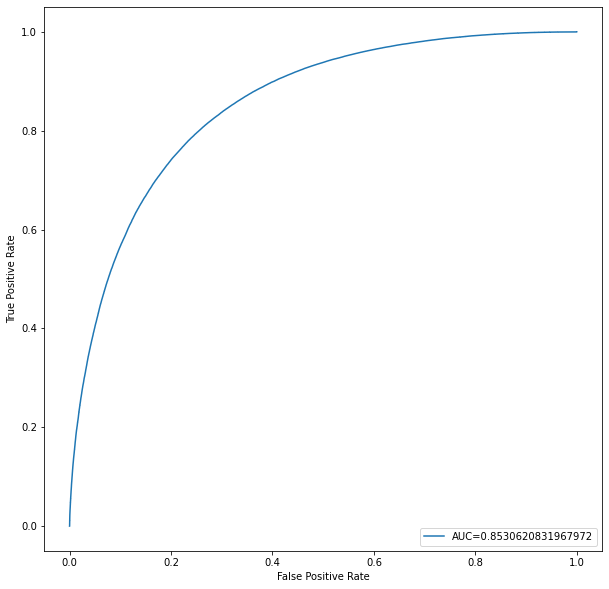

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(
    y_val,
    y_hat
)

auc = roc_auc_score(y_val, y_hat)

plt.figure(figsize=(10,10))

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
batch_size = 256

def get_test_evaluation(X_test_preprocess, X_test_tokens):
    y_hats = []

    for idx in range(0, X_test_preprocess.shape[0], batch_size):
        X_test_tensor = X_test_preprocess[idx:idx+batch_size].to(device)
        X_test_tokens_indices = X_test_tokens[idx:idx+batch_size]
        X_test_tokens_indices = pad_sequence(X_test_tokens_indices, batch_first=True, padding_value=biobert_tokenizer("[PAD]")["input_ids"][1]).to(device)
        #X_test_drug_tokens_indices = X_test_tokens_drug[idx:idx+batch_size]
        #X_test_drug_tokens_indices = pad_sequence(X_test_drug_tokens_indices, batch_first=True, padding_value=len(drug_encoder.categories_[0])).to(device)
        #X_test_drug_tokens_indices = X_test_drug_tokens_indices.int()

        y_hat_ = ((network.predict((X_test_tensor, X_test_tokens_indices)).detach().cpu()) >= 0.65)*1

        y_hats.append(y_hat_)

    y_hat = torch.concat(y_hats, axis=0).numpy()
    y_true = y_test_preprocess[:,[5]]
    #y_true = y_test_preprocess[:,:]

    return y_hat, y_true

y_hat, y_true = get_test_evaluation(X_test_preprocess, X_test_tokens)
titles = y_train.columns.tolist()[1:]
titles = y_train.columns[[6]].tolist()

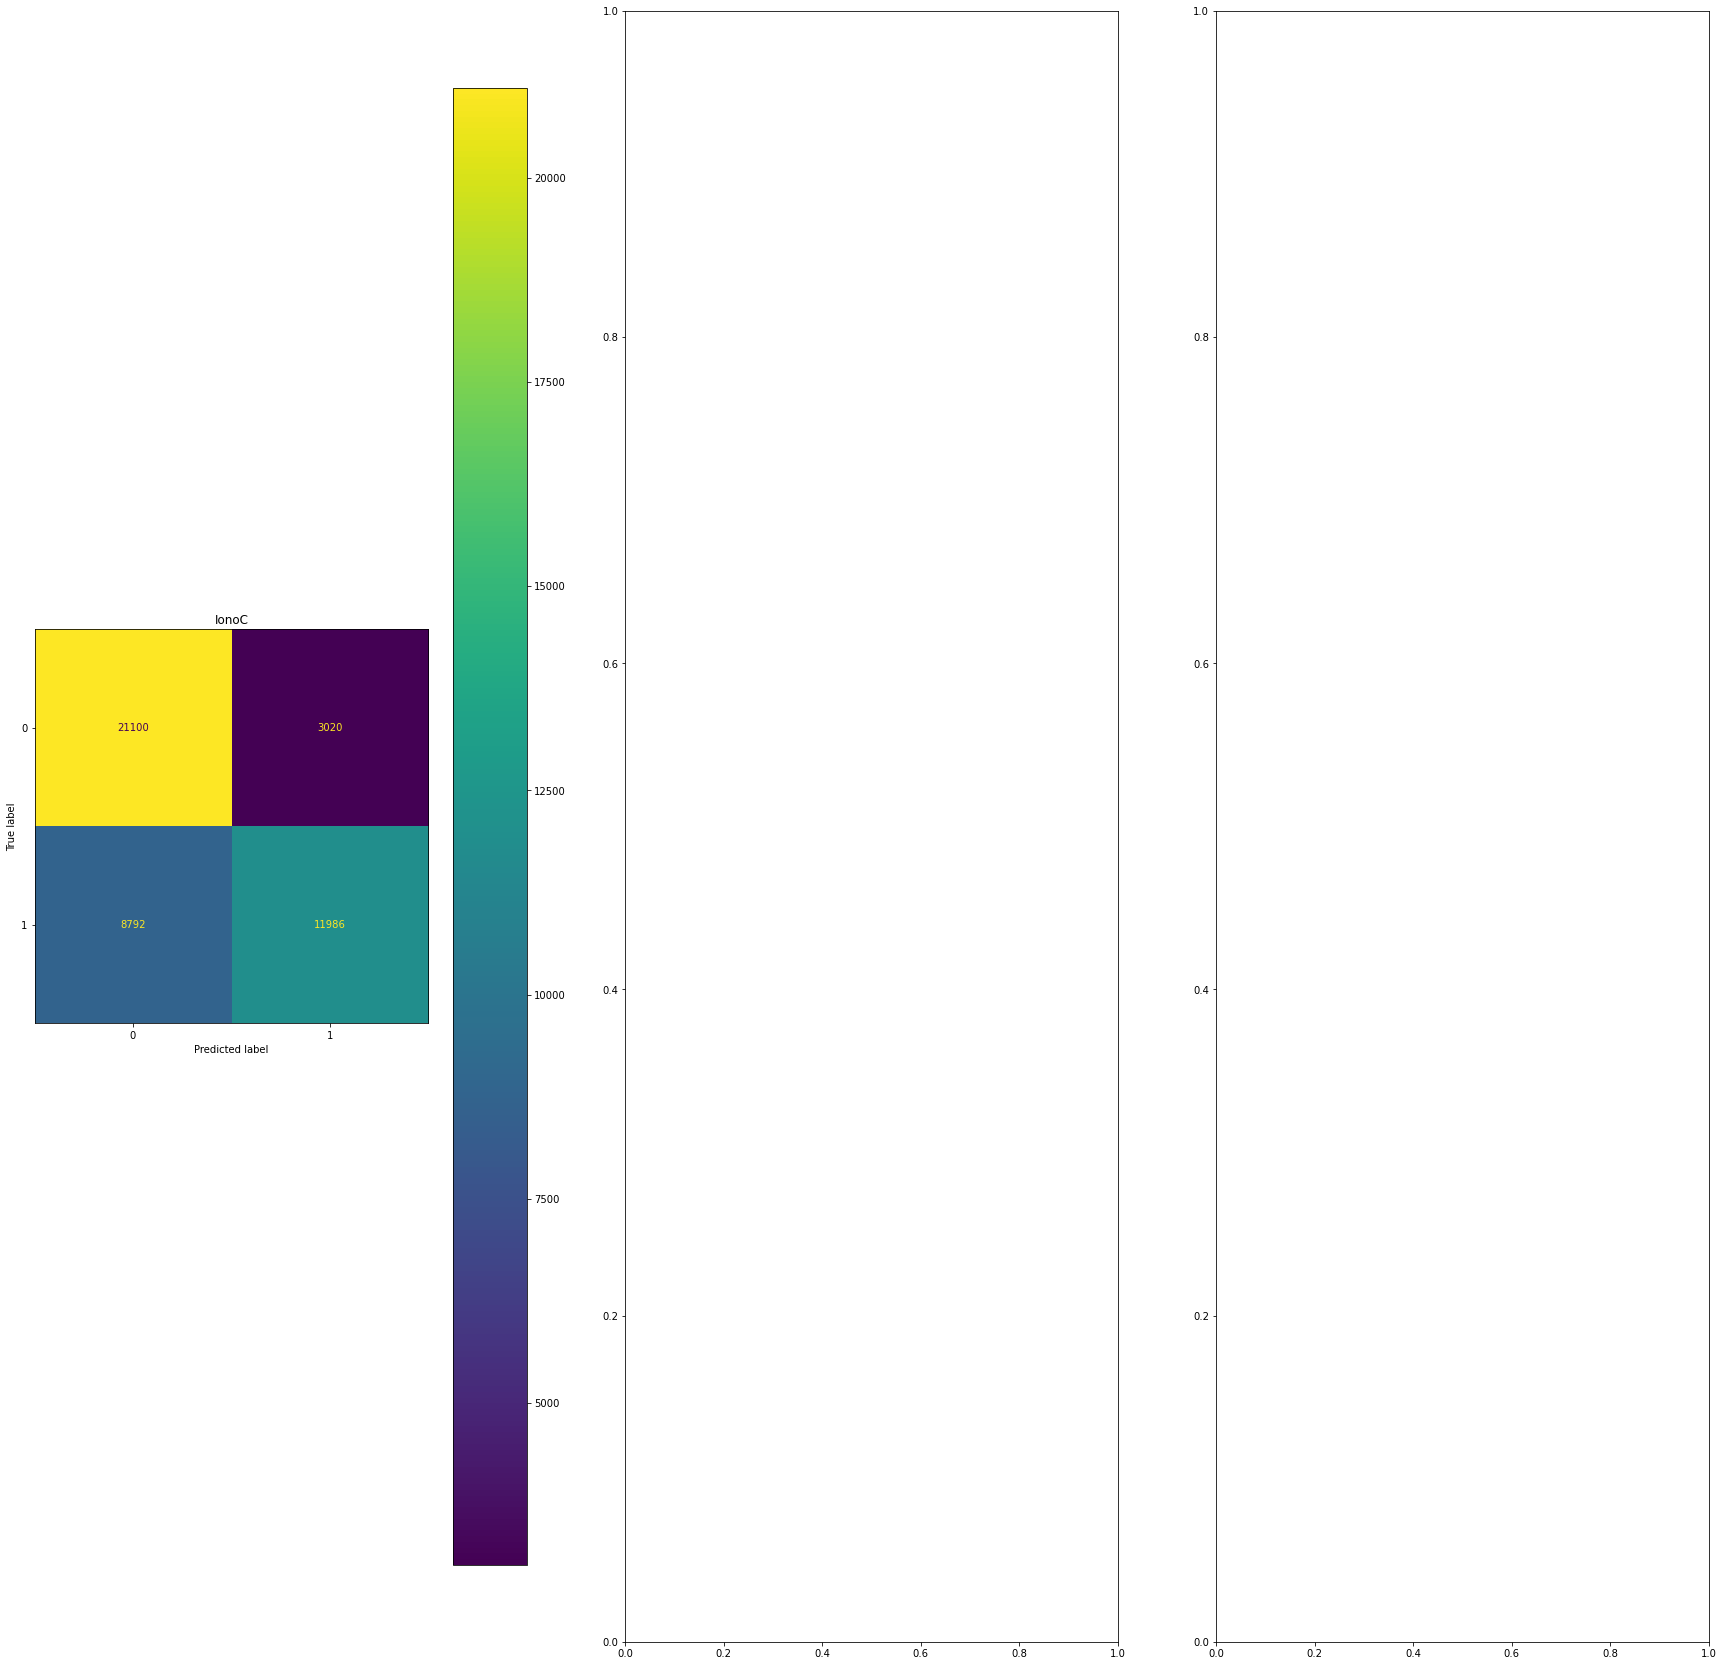

In [ ]:
n_cols = 3
n_rows = len(titles) // n_cols + int((len(titles)%n_cols) != 0)

figs, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,30))
axs_flatten = axs.flatten()

for i in range(len(titles)):
    cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_true[:,i], y_hat[:,i]))
    cm_plot.plot(ax=axs_flatten[i])
    axs_flatten[i].set_title(titles[i])

plt.show()

In [ ]:
pd.DataFrame.from_dict(
    dict(zip(titles, np.concatenate([
        precision_score(y_true, y_hat, average="binary", zero_division=0).reshape(1,-1),
        recall_score(y_true, y_hat, average="binary", zero_division=0).reshape(1,-1),
        f1_score(y_true, y_hat, average="binary").reshape(1,-1)
    ], axis=0).T)),
    orient="index",
    columns=["precision","recall","f1_score"]
).round(2)

,precision,recall,f1_score
IonoC,0.8,0.58,0.67
